
<br>
<font>
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=150 height=150> <br>
<font color=0F5298 size=7>
Artificial Intelligence <br>
<font color=2565AE size=5>
Computer Engineering Department <br>
Spring 2024<br>
<font color=3C99D size=5>
Practical Assignment 1 - Local Search <br>
<font color=696880 size=4>
Ali Aghayari


____

# Personal Data

In [127]:
# Set your student number
student_number = '401105901'
Name = 'Amirardalan'
Last_Name = 'Dehghanpour'

# Rules

<font color=red>
Please run all the cells.
</font>

# Libraries

In [128]:
!pip install tsp_solver2

In [129]:
# import libraries here
import matplotlib.pyplot as plt
import numpy as np
import math
import random
import time
import itertools
from tsp_solver.greedy import solve_tsp


# Q1: TSP problem

## Problem Definition

Consider the Euclidean  [Traveling Salesperson Problem](https://en.wikipedia.org/wiki/Travelling_salesman_problem):</br>
- In this problem, we are considering a country with n cities that are randomly placed; our country is a 1000 by 1000 square; we want to find the shortest tour for this country using their coordinates.
- A tour is a cycle that passes each city precisely one time.
- In this notebook we will develop some solutions to the problem, and more generally show how to think about solving a problem like this.



## Problem Representation (20 Points)

 We want to create our problem structure and present some valuable methods in this part.
 - init: choose your problem structure and create the variables accordingly.
 - distance: take two cities and return the distance between them.
 - tour length: get a tour and return the length of the given tour.
 - The shortest tour: get a set of tours and return the shortest one.
 - plot tour: get a tour and plot tour of the country.
 - nearest_neighbor: get a semi-tour and return to the nearest city to the last element you have yet to visit.

In [130]:
class TSP:
  # TODO : cities, num cities, distances = ?

  def __init__(self, num_cities, cities = None):
    if(cities==None):
      self.number_of_cities=num_cities
      self.distances = [[0 for _ in range(self.number_of_cities)] for _ in range(self.number_of_cities)]
      self.cities=[]
      for i in range(0,num_cities):
        x = random.randint(1, 1000)
        y = random.randint(1,1000)
        self.cities.append((x, y))
      for i in range(0,num_cities):
        for j in range(0,num_cities):
          self.distances[i][j]=((self.cities[i][0] - self.cities[j][0])**2 + (self.cities[i][1] - self.cities[j][1])**2)**0.5
    # TODO : if cities is None --> create randomly placed cities with respect to num_cities
    # TODO : else --> use the given data
    # note : city axis values can be from 0 to 1000
    pass

  def distance(self, A, B):
    x1=self.cities[A][0]
    y1=self.cities[A][1]
    x2=self.cities[B][0]
    y2=self.cities[B][1]
    return ((x1-x2)**2+(y1-y2)**2)**0.5
    # TODO : return distance between city with index/number A and B in cities array
    pass

  def tour_length(self, tour):
    total_length=0
    for i in range(0,len(tour)-1):
      x1=tour[i][0]
      y1=tour[i][1]
      x2=tour[i+1][0]
      y2=tour[i+1][1]
      total_length=total_length+((x1-x2)**2+(y1-y2)**2)**0.5
    x1=tour[len(tour)-1][0]
    y1=tour[len(tour)-1][1]
    x2=tour[0][0]
    y2=tour[0][1]
    total_length=total_length+((x1-x2)**2+(y1-y2)**2)**0.5
    return total_length
    # get the list of cities and return the tour length
    pass
  def semi_tour_length(self, tour):
    total_length=0
    for i in range(0,len(tour)-1):
      x1=self.cities[tour[i]][0]
      y1=self.cities[tour[i]][1]
      x2=self.cities[tour[i+1]][0]
      y2=self.cities[tour[i+1]][1]
      total_length=total_length+((x1-x2)**2+(y1-y2)**2)**0.5
    return total_length
    # get the list of cities and return the tour length
    pass
  def tour_length_indexed(self, tour):
    total_length=0
    for i in range(0,len(tour)-1):
      x1=self.cities[tour[i]][0]
      y1=self.cities[tour[i]][1]
      x2=self.cities[tour[i+1]][0]
      y2=self.cities[tour[i+1]][1]
      total_length=total_length+((x1-x2)**2+(y1-y2)**2)**0.5
    x1=self.cities[tour[len(tour)-1]][0]
    y1=self.cities[tour[len(tour)-1]][1]
    x2=self.cities[tour[0]][0]
    y2=self.cities[tour[0]][1]
    total_length=total_length+((x1-x2)**2+(y1-y2)**2)**0.5
    return total_length
    # get the list of cities and return the tour length
    pass
  def shortest_tour(self, tours):
    Min_tour=tours[0]
    for tour in tours:
      if self.tour_length(tour)<self.tour_length(Min_tour):
        Min_tour=tour

    return Min_tour,self.tour_length(Min_tour)
    # TODO : get a list of toues and return : shortest_tour, shortest_length
    pass

  def plot_tour(self, tour):
    x_coords = [point[0] for point in tour]
    y_coords = [point[1] for point in tour]

# Plot points
    plt.scatter(x_coords, y_coords, color='pink')

# Draw roads (lines between points)
    for i in range(len(tour)):
      plt.plot([tour[i][0], tour[(i+1)%len(tour)][0]], [tour[i][1], tour[(i+1)%len(tour)][1]], color='blue')
    plt.xlim(0, 1000)
    plt.ylim(0, 1000)

    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Tour')
    plt.grid(True)
    plt.show()
    # TODO : tour will be given an its expected to plot a good representation of the tour and cities
    pass

  def nearest_neighbor(self, A, cities, count = None):
    MIN=100000000
    nearest_ne=A;
    if count==None:
      for i in range(0,len(cities)):
        if i!=A:
          if self.distance(i,A)<MIN:
            MIN=self.distance(i,A)
            nearest_ne=i

      return nearest_ne
    Sorted_Min=[]
    for i in range(0,len(cities)):
      if i!=A:
        Sorted_Min.append(((self.distance(i,A)),i))
    sorted_list = sorted(Sorted_Min, key=lambda tup: tup[0])
    Closest=[]
    for i in range(0,count):
      Closest.append(sorted_list[i][1])
    return Closest

    # city "A" will be given and we expect
    # if count == None -->  get the nearest neighbor from the list "cities"
    # else --> we need "count" closest neighbors
    pass

## Brute Force (5 Points)

Let's start with an algorithm that is guaranteed to solve the problem (although it is inefficient for large sets of cities) </br>
we can achieve this by generating all possible tours of the cities and choosing the shortest tour (the one with minimum tour length).

In [131]:
def alltours_tsp(tsp):
    temp=itertools.permutations(tsp.cities)
    my_tours=list(temp)
    return tsp.shortest_tour(my_tours)
    # TODO : generate all possible tours and return the shortest tour
    # note : don't create duplicate possible tours
    pass

Now, try to create a country with five cities and apply your brute force function to find the shortest tour.

In [132]:
mycountry=TSP(5)
shortest_Tour=alltours_tsp(mycountry)
# TODO : create a country using the TSP class
# TODO : run the algorithm
# TODO : present the answer

Visualize your answer for the TSP problem

((450, 809), (222, 480), (467, 292), (869, 71), (742, 870))


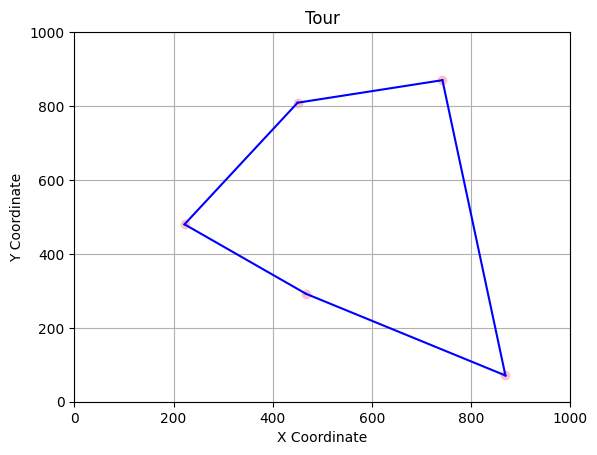

In [133]:
print(shortest_Tour[0])
mycountry.plot_tour(shortest_Tour[0])
# TODO : plot the answer using the TSP util methods




Try this algorithm on countries with 4, 6, 8, and 10 cities and plot the time it takes to calculate the answer.

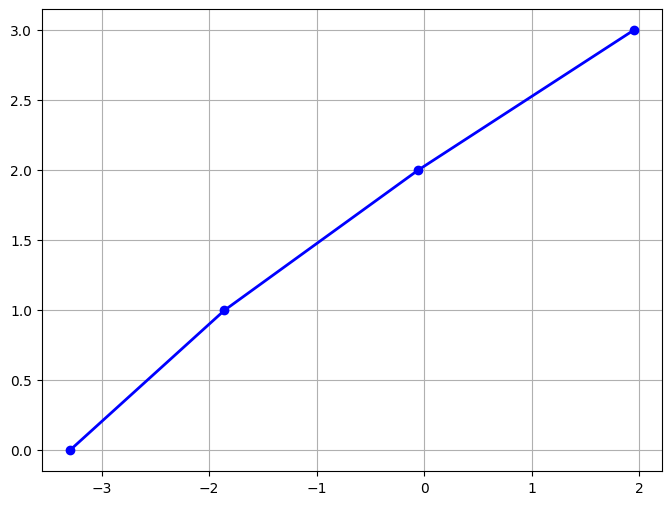

In [134]:

from datetime import datetime
# TODO: create different countries
mycountry1=TSP(4)
mycountry2=TSP(6)
mycountry3=TSP(8)
mycountry4=TSP(10)
# TODO: run the algorithm and consider its run time
start = time.time()
shortest_Tour1=alltours_tsp(mycountry1)
end = time.time()
td1 = (end - start)
start = time.time()
shortest_Tour2=alltours_tsp(mycountry2)
end = time.time()
td2 = (end - start)
start = time.time()
shortest_Tour3=alltours_tsp(mycountry3)
end =time.time()
td3 = (end - start)
start = time.time()
shortest_Tour4=alltours_tsp(mycountry4)
end = time.time()
td4 = (end - start)
numbers=[]
numbers.append(td1)
numbers.append(td2)
numbers.append(td3)
numbers.append(td4)
log_numbers=[np.log10(num) for num in numbers]
plt.figure(figsize=(8,6))
plt.plot(log_numbers,range(len(log_numbers)),marker='o',color='b',linestyle='-',linewidth=2)
plt.grid(True)
plt.show()
# TODO: plot the run times accordingly
# note : you can use log(time) for better visualisation
# note : given example is using log

## local Algorithms

### Initial Functions (25 Points)

We will create some functions for our initial state and use these functions for our local algorithms later.

- random initial function: Create a feasible tour randomly.

In [136]:
def random_initial(tsp):
    randomized_list = tsp.cities[:]  # Create a copy of the original list
    random.shuffle(randomized_list)  # Shuffle the elements in the copy
    tour=randomized_list
    return tour,tsp.tour_length(tour)

  # TODO : create a random tour and return tour, length
    pass

- nearest neighbor initial function: Start at any city; at each step, extend the tour by moving from the previous city to its nearest neighbor that has yet to be visited.

In [137]:
def nearest_neighbor_initial(tsp):
   counter=1;
   visited_flags = [[0 for _ in range(1000)] for _ in range(1000)]
   tour=[]
   list_size = 0
   for _ in tsp.cities:
     list_size += 1
   shortest_neighbors=[]
   start_i = random.randint(0,list_size-1)
#   print("Start is ")
#   print(start_i)
   visited_flags[tsp.cities[start_i][0]][tsp.cities[start_i][1]]=1
   shortest_neighbors = [[i for i in range(list_size)] for _ in range(list_size)]
   for i in range(0,list_size):
      shortest_neighbors[i]=tsp.nearest_neighbor(i,tsp.cities,list_size-1)
   tour.append(tsp.cities[start_i])
   j=0
   while True:
          if(visited_flags[tsp.cities[shortest_neighbors[start_i][j]][0]][tsp.cities[shortest_neighbors[start_i][j]][1]]==0):
              tour.append(tsp.cities[shortest_neighbors[start_i][j]])
              counter=counter+1
              visited_flags[tsp.cities[shortest_neighbors[start_i][j]][0]][tsp.cities[shortest_neighbors[start_i][j]][1]]=1
              for k in range(0,list_size):
                if(tsp.cities[k][0]==tsp.cities[shortest_neighbors[start_i][j]][0] and tsp.cities[k][1]==tsp.cities[shortest_neighbors[start_i][j]][1]):
                  start_i=k
                  break
              j=0
              if(counter==list_size):
                break
          else:
            j=j+1
   return tour,tsp.tour_length(tour)
  # TODO : create a nearest neighbor tour as above and return tour, length
   pass

- repeated nearest neighbor initial function : You can improve nearest neighbor algorithm by running it multiple times with different starting cities and using the best-generated answer.

In [138]:
def repeated_nearest_neighbor_initial(tsp, repetitions = None):
  all_tours=[]
  if(repetitions == None):
      for i in range(0,len(tsp.city_num)):
        new_tour,tour_length=nearest_neighbor_initial(tsp)
        all_tours.append(new_tour)
      shortest_tour,min_tour_length=tsp.shortest_tour(all_tours)
      return shortest_tour,min_tour_length
  for i in range(0,repetitions):
        new_tour,tour_length=nearest_neighbor_initial(tsp)
        all_tours.append(new_tour)
  shortest_tour,min_tour_length=tsp.shortest_tour(all_tours)
  return shortest_tour,min_tour_length
    # TODO : repeat nearest_neighbor_initial for better performance
    # note : if repetitions == None --> repetition = tsp.city_num
  pass

Now, try to create a country with 30 cities, apply your repeated_nearest_neighbor_initial function with repetitions of 1, 4, 8, 12, and compare the results.

In [139]:
country=TSP(30)
tours_withRep=[]
len_tours_withRep=[]
tour,length=repeated_nearest_neighbor_initial(country, 1)
tours_withRep.append(tour),len_tours_withRep.append(length)
tour,length=repeated_nearest_neighbor_initial(country, 4)
tours_withRep.append(tour),len_tours_withRep.append(length)
tour,length=repeated_nearest_neighbor_initial(country, 8)
tours_withRep.append(tour),len_tours_withRep.append(length)
tour,length=repeated_nearest_neighbor_initial(country, 12)
tours_withRep.append(tour),len_tours_withRep.append(length)
# TODO: create different countries
# TODO: run the algorithm and consider its tour length
# TODO: plot/print the tour lengths accordingly
print(len_tours_withRep)
#print(tours_withRep)

[5564.062757156025, 4574.382411748284, 4725.580093448905, 4574.382411748283]


Does repetition make our answer optimal? "your short answer here!"

- beam search initial function: Start with a list of n cities; at each step, extend your semi-tours by moving from their previous cities to their n nearest neighbors and then pick out n semi-tours from these generated semi-tours of length i+1

In [140]:
def beam_search_initial(tsp, n, iter):
  numbers=[]
  for i in range(0,len(tsp.cities)):
    numbers.append(i)
  random_numbers = random.sample(numbers, k=n)
  queue = [[-1 for _ in range(len(tsp.cities))] for _ in range(n)]
  for i in range(0,n):
    queue[i][0]=random_numbers[i]
  bigger_queue=[]
  for_sorting_bigger=[]
  #print("queue is    ")
  #print(queue)
  #print("queue finish")
  # TODO : initial n starting points and name it as queue
  for i in range(0,len(tsp.cities)-1):
    bigger_queue=[]
    for j in range(0,n):
      A=queue[j][i]
      Closest_neighbors=tsp.nearest_neighbor(A,tsp.cities,len(tsp.cities)-1)
      for_n=0
      counter=0
      #print("city is    ")
      #print(A)
      #print("closest_neighbors")
      #print(Closest_neighbors)
      #print("bigger queue is")
      #print(bigger_queue)
      #print("xxxxxxx")
      while True:
        #print("for n iss")
        #print(for_n)
        if(for_n==len(Closest_neighbors)):
          break
        if Closest_neighbors[for_n] not in queue[j]:
          temp_array=[]
          for w in range(0,i+1):
            temp_array.append(queue[j][w])
          temp_array.append(Closest_neighbors[for_n])
          #print("temp array is")
          #print(temp_array)
          bigger_queue.append(temp_array)
          counter=counter+1
          if(counter==n):
            break
        for_n=for_n+1
    #print("finishing bigggger queue")
    #print(bigger_queue)
    for_sorting=[]
    sorted_list=[]
    for_sorting_bigger=[]
    for t in range(0,len(bigger_queue)):
      #print("t is")
      #print(t)
      tour_length=tsp.semi_tour_length(bigger_queue[t])
      for_sorting_bigger.append((tour_length,t))
      sorted_list = sorted(for_sorting_bigger, key=lambda tup: tup[0])
    queue = [[0 for _ in range(len(tsp.cities))] for _ in range(n)]
    #print("sorted is")
    #print(sorted_list)
    for i in range(0,n):
      #print("i iss")
      #print(i)
      #print(sorted_list[i][1])
      #print("sizee is")
      #print(len(bigger_queue))
      #print(bigger_queue[sorted_list[i][1]])
      queue[i]=(bigger_queue[sorted_list[i][1]])
  sorted_queues=[]
  for i in range(0,len(queue)):
    sorted_queues.append((tsp.tour_length_indexed(queue[i]),i ))
  sorted_queues=sorted(sorted_queues, key=lambda tup: tup[0])
  return queue[sorted_queues[0][1]],sorted_queues[0][0]
  # TODO : in every iter : (iter range could not be less than tsp.city_num)
    # TODO : use the queue elements to create n new elements from each (new elements contain more cities)
    # TODO : filter these n^2 elements and just use n of them and name them as queue

  # TODO : return tour, length of the best option in queue

  pass

Now, try to create a country with 30 cities, apply these initial functions, and compare the tour length of these initial tours with each other and the optimal answer (if city_num is low).

In [141]:
# TODO: create a country
country=TSP(30)
tour_Random,length_Random=random_initial(country)
tour_Nearest,length_Nearest=nearest_neighbor_initial(country)
tour_Repeated,length_Repeated=repeated_nearest_neighbor_initial(country,10)
tour_beam,length_beam=beam_search_initial(country,5,100)
print("random_initial length :  " + str(length_Random))
print("nearest_neighbor_initial length :  " + str(length_Nearest))
print("repeated_nearest_neighbor_initial length :  " + str(length_Repeated))
print("beam_search_initial length :  " + str(length_beam))
# TODO: run the needed algorithms and consider their tour length
# note : repeated_nearest_neighbor_initial(tsp, 10) and beam_search_initial(tsp, 5, 100) are used in
# the example below; you are free to use other parameters.

random_initial length :  14575.638663694705
nearest_neighbor_initial length :  5166.733387890803
repeated_nearest_neighbor_initial length :  4828.5976315688995
beam_search_initial length :  5955.633954289941


Plot these tours and compare them visually.

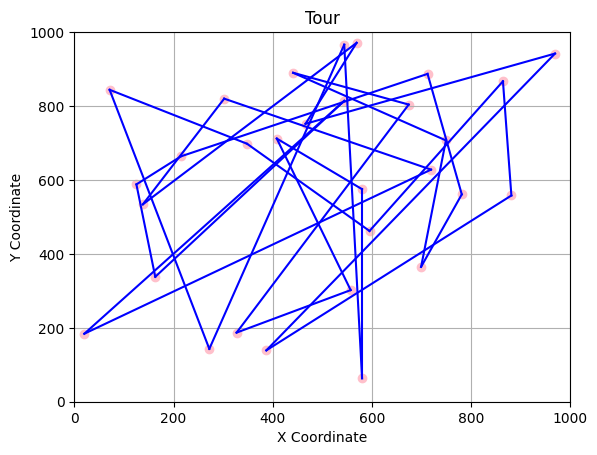

In [142]:
# TODO: plot the tours accordingly (random)
country.plot_tour(tour_Random)

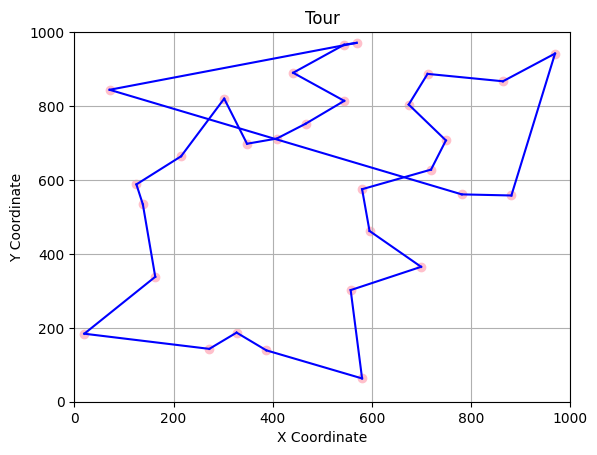

In [143]:
# TODO: plot the tours accordingly (nn)
country.plot_tour(tour_Nearest)

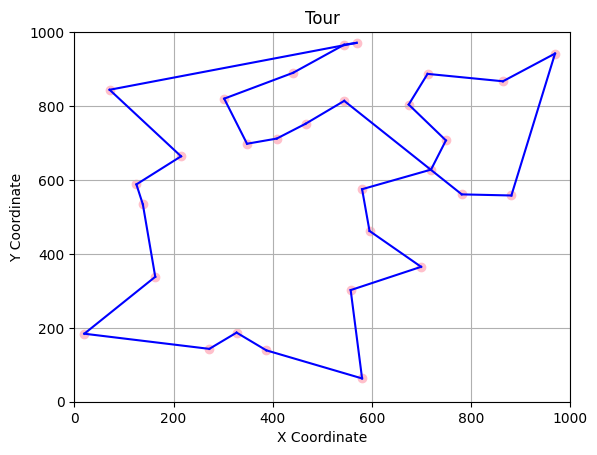

In [144]:
# TODO: plot the tours accordingly (rnn)
country.plot_tour(tour_Repeated)

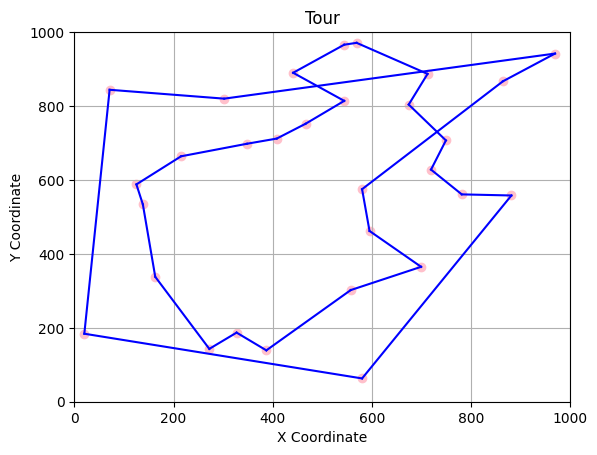

In [145]:
# TODO: plot the tours accordingly (beam)
tour=[]
for i in range(0,len(tour_beam)):
  tour.append(((country.cities[tour_beam[i]][0]),(country.cities[tour_beam[i]][1])))
country.plot_tour(tour)

### LKH (25 Points)

Implement a simplified version of [LKH](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwimj7nFoqCEAxWzh_0HHc98Df4QFnoECCQQAQ&url=https%3A%2F%2Fen.wikipedia.org%2Fwiki%2FLin%25E2%2580%2593Kernighan_heuristic&usg=AOvVaw0G05-wkkun1YAp6zPfWuLd&opi=89978449) for this problem.</br>
- This local search algorithm takes the initial state and improves it over time by swapping a part of the tour sequence.
- In this modified version, we will check every (i,j) pair at each iteration and reverse the tour from index "I" to index "J" if it improves our tour.


In [146]:
def lin_kernighan(tsp, initial, iterations=10):
    # TODO : init
    # TODO : for iteration :
    first_tour=[]
    reverse_tour=[]
    for i in range(0,iterations):
      for j in range(0,len(initial)):
        for k in range(j+1,len(initial)):
          first_tour=[]
          checking=[]
          checking=copied_array = initial.copy()
          checking[j:k+1]=reversed(initial[j:k+1])
          #print("new????")
          #print(tsp.tour_length_indexed(checking))
          #print("before????")
          #print(tsp.tour_length_indexed(initial))
          #print("xxxxxxx")
          if(tsp.tour_length_indexed(checking)<tsp.tour_length_indexed(initial)):
           #print("Salam")
          #print("neww")
           #print(tsp.tour_length_indexed(checking))
           #print("befoore")
           #print(tsp.tour_length_indexed(initial))
           #print("Xxxxxxxxx")
           initial=checking
    return initial,tsp.tour_length_indexed(initial)
      # TODO : for every distinct pair of (i, j):
        # TODO : If the reverse technique improves our tour, replace the reversed version with the actual version.
        # note : reverse technique : a1 a2 a3 a4 ... a10 ----with i = 2,  j = 5 ----> a1 a5 a4 a3 a2 a6 .... a10

    # TODO :  return tour, distance
    pass


Run this algorithm on a reasonably big country and visualize it.</br>
You can use any initial state in this part.

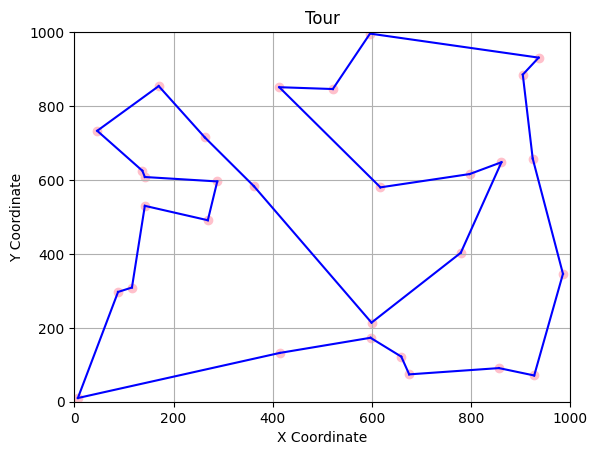

5657.640526121947


In [147]:
# TODO : create a country using the TSP class
country=TSP(30)
initial_state = list(range(30))
random.shuffle(initial_state)
tour=[]
for_print=[]
tour,length_of_tour=lin_kernighan(country,initial_state,10)
for i in range(0,len(initial_state)):
  for_print.append(((country.cities[tour[i]][0]),(country.cities[tour[i]][1])))
country.plot_tour(for_print)
print(country.tour_length(for_print))
# TODO : run the algorithm
# TODO : plot the answer

### Simulated Annealing (25 Points)

Implement simulated annealing for this problem.

In [148]:
def simulated_annealing(tsp, initial, initial_temperature=1000, cooling_rate=0.99, num_iterations=10000):
    # TODO : init
      temperature=initial_temperature
      for i in range(0,num_iterations):
        if(temperature<0):
          return initial,tsp.tour_length_indexed(initial)
        first=random.randint(0,len(tsp.cities)-1)
        second=random.randint(0,len(tsp.cities)-1)
        if(first>second):
          first,second=second,first
        checking=initial.copy()
        checking[first:second+1]=reversed(initial[first:second+1])
        delta=tsp.tour_length_indexed(checking)-tsp.tour_length_indexed(initial)
        if delta<0 or random.random() < math.exp(-1*delta / temperature):
            initial = checking
        temperature *= cooling_rate
      return initial,tsp.tour_length_indexed(initial)
    # TODO : for iterantion:
      # TODO : get a neighbor
      # note : create neighbors using the reversing method,  but this time improvement is not important
      # TODO : with the acceptence probability, accept!
      # TODO : if it has a improvement, accept!
      # TODO : update tour if accepted
      # TODO : update temp

    # return tour, length
      pass

Run this algorithm on a reasonably big country and visualize it.</br>
You can use any initial state in this part.

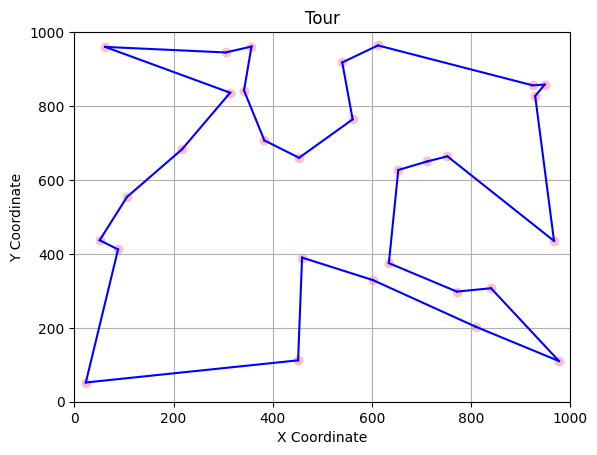

5429.771822985768


In [149]:
# TODO : create a country using the TSP class
country=TSP(30)
initial_state = list(range(30))
random.shuffle(initial_state)
tour=[]
tour,length=simulated_annealing(country, initial_state, initial_temperature=1000, cooling_rate=0.99, num_iterations=10000)
for_print=[]
for i in range(0,len(initial_state)):
  for_print.append(((country.cities[tour[i]][0]),(country.cities[tour[i]][1])))
country.plot_tour(for_print)
print(country.tour_length(for_print))
# TODO : run the algorithm
# TODO : plot the answer

### Analysis

- The given code can calculate an acceptable approximated answer.
- use this code to compare your algorithms.

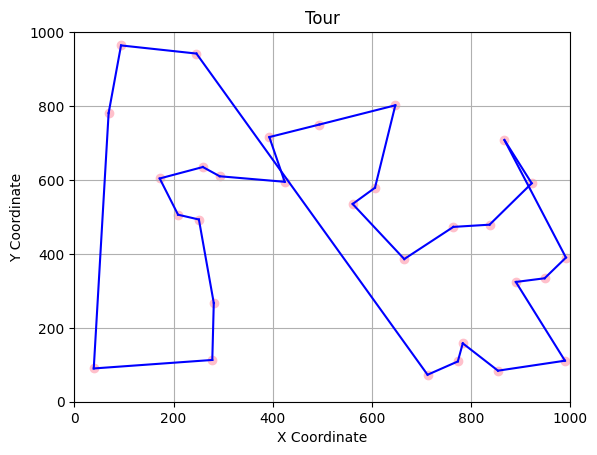

5459.355255684834


In [150]:
tsp=TSP(30)
tour = solve_tsp(tsp.distances)
path=[]
for i in range(0,len(tour)):
  path.append((tsp.cities[tour[i]][0],tsp.cities[tour[i]][1]))
tsp.plot_tour(path)
print(tsp.tour_length(path))

- analyze the lengths you get from the two algorithms with different initial functions
- plot these tours and explain the results (results may be inconsistent as they are approximations)

treshhold :  5459.355255684834
lkh random :  5057.508800823175
lkh nn :  5101.473481628606
lkh rnn :  5133.840666131664
lkh beam :  5017.031676566855
simulated random :  4862.558157356294
simulated nn :  4865.156605058054
simulated rnn :  5007.741101451319
simulated beam :  4951.43130313653


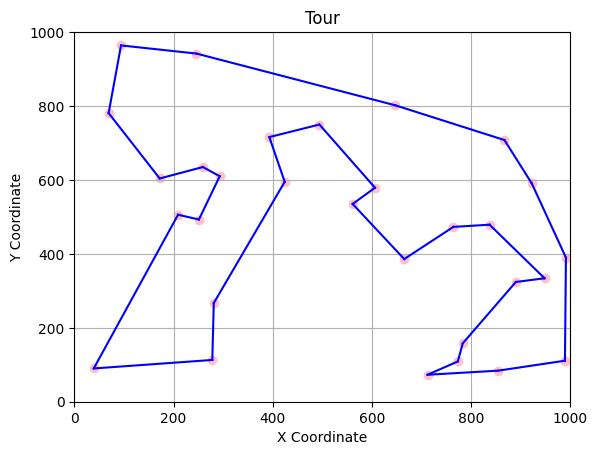

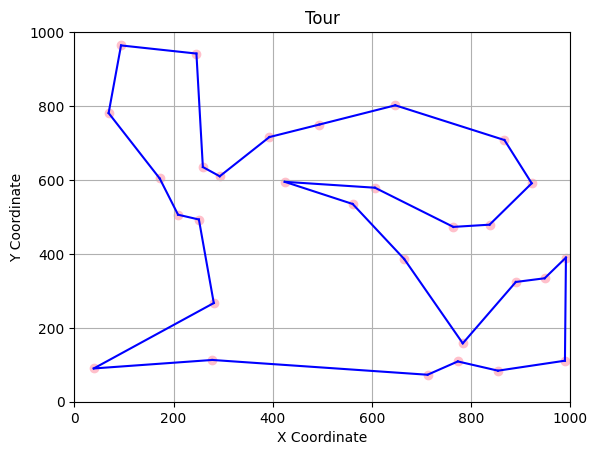

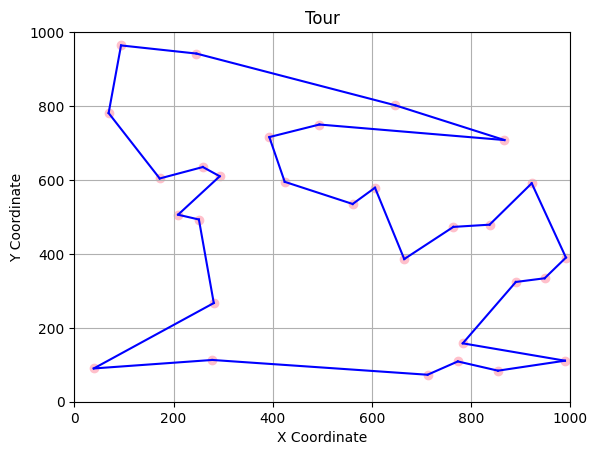

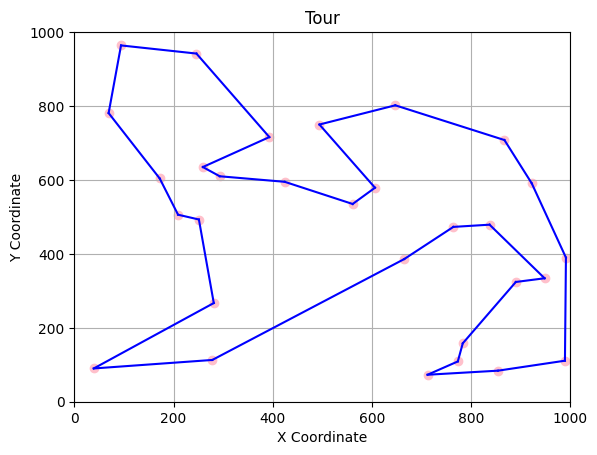

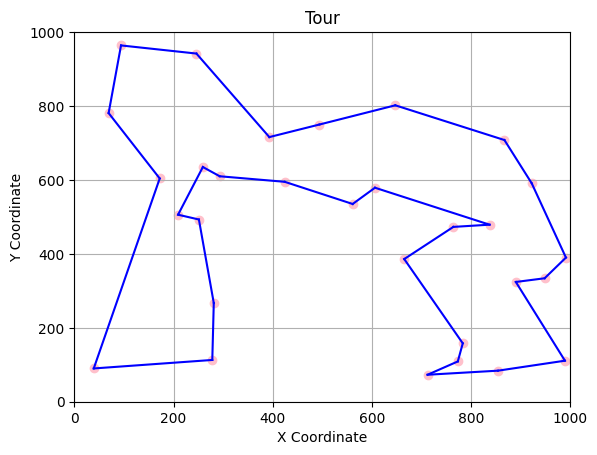

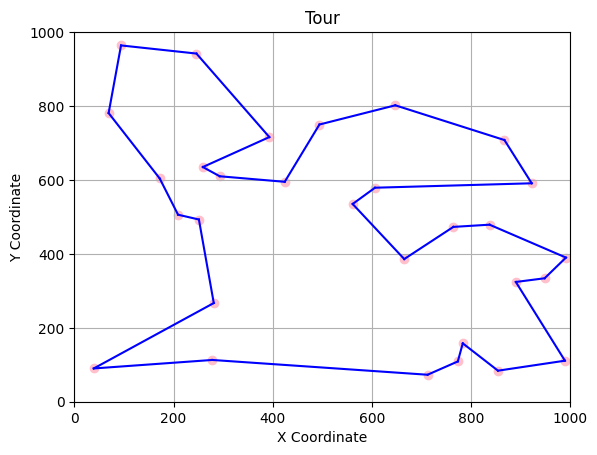

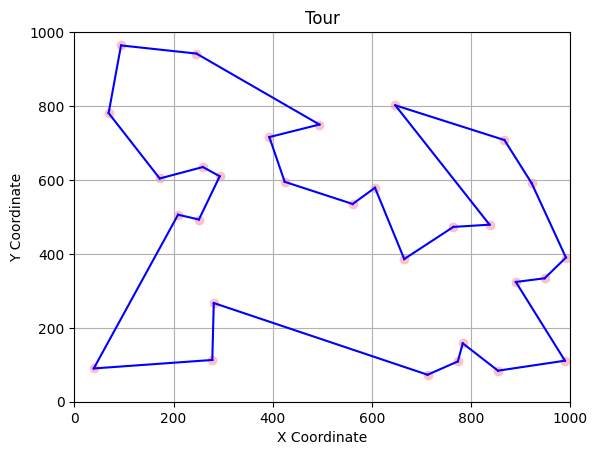

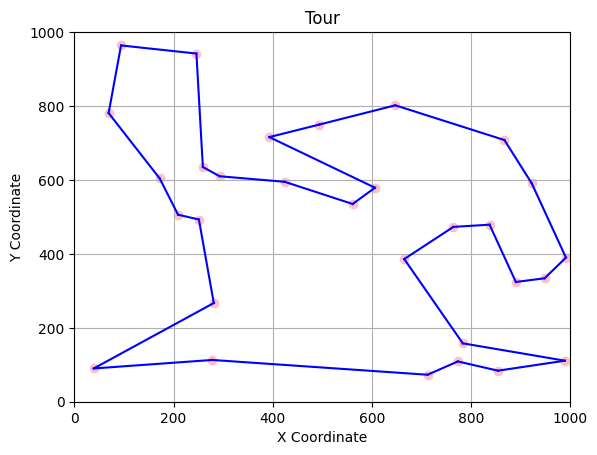

In [151]:
Random_tour,length_Random=random_initial(tsp)
Nearest_tour,length_Nearest=nearest_neighbor_initial(tsp)
Repeated_tour,length_Repeated=repeated_nearest_neighbor_initial(tsp,10)
beam_tour,length_beam=beam_search_initial(tsp,5,200)
Random_tour_indexed=[]
Nearest_tour_indexed=[]
Repeated_tour_indexed=[]
for i in range(0,len(tsp.cities)):
  for j in range(0,len(Random_tour)):
    if ((tsp.cities[i][0]==Random_tour[j][0]) and (tsp.cities[i][1]==Random_tour[j][1])):
      Random_tour_indexed.append(j)
for i in range(0,len(tsp.cities)):
  for j in range(0,len(Nearest_tour)):
    if ((tsp.cities[i][0]==Nearest_tour[j][0]) and (tsp.cities[i][1]==Nearest_tour[j][1])):
      Nearest_tour_indexed.append(j)
for i in range(0,len(tsp.cities)):
  for j in range(0,len(Repeated_tour)):
    if ((tsp.cities[i][0]==Repeated_tour[j][0]) and (tsp.cities[i][1]==Repeated_tour[j][1])):
      Repeated_tour_indexed.append(j)
lin_random,length_lin_random=lin_kernighan(tsp,Random_tour_indexed,10)
lin_neighbor,length_lin_neighbor=lin_kernighan(tsp,Nearest_tour_indexed,10)
lin_repeated,length_lin_repeated=lin_kernighan(tsp,Repeated_tour_indexed,10)
lin_beam,length_lin_beam=lin_kernighan(tsp,beam_tour,10)
sim_random,length_sim_random=simulated_annealing(tsp,Random_tour_indexed)
sim_nearest,length_sim_nearest=simulated_annealing(tsp,Nearest_tour_indexed)
sim_repeated,length_sim_repeated=simulated_annealing(tsp,Repeated_tour_indexed)
sim_beam,length_sim_bim=simulated_annealing(tsp,beam_tour)
print("treshhold : ",tsp.tour_length(path))
print("lkh random : ",length_lin_random)
print("lkh nn : ",length_lin_neighbor)
print("lkh rnn : ",length_lin_repeated)
print("lkh beam : ",length_lin_beam)



print("simulated random : ",length_sim_random)
print("simulated nn : ",length_sim_nearest)
print("simulated rnn : ",length_sim_repeated)
print("simulated beam : ",length_sim_bim)

#lkh_Random,length_lkh_Random=lin_kernighan(tsp,)
tour=[]
myplot=lin_random.copy()
for i in range(0,len(myplot)):
  tour.append((tsp.cities[myplot[i]][0],tsp.cities[myplot[i]][1]))
tsp.plot_tour(tour)
tour=[]
myplot=lin_neighbor.copy()
for i in range(0,len(myplot)):
  tour.append((tsp.cities[myplot[i]][0],tsp.cities[myplot[i]][1]))
tsp.plot_tour(tour)
tour=[]
myplot=lin_repeated.copy()
for i in range(0,len(myplot)):
  tour.append((tsp.cities[myplot[i]][0],tsp.cities[myplot[i]][1]))
tsp.plot_tour(tour)
tour=[]
myplot=lin_beam.copy()
for i in range(0,len(myplot)):
  tour.append((tsp.cities[myplot[i]][0],tsp.cities[myplot[i]][1]))
tsp.plot_tour(tour)
tour=[]
myplot=sim_random.copy()
for i in range(0,len(myplot)):
  tour.append((tsp.cities[myplot[i]][0],tsp.cities[myplot[i]][1]))
tsp.plot_tour(tour)
tour=[]
myplot=sim_nearest.copy()
for i in range(0,len(myplot)):
  tour.append((tsp.cities[myplot[i]][0],tsp.cities[myplot[i]][1]))
tsp.plot_tour(tour)
tour=[]
myplot=sim_repeated.copy()
for i in range(0,len(myplot)):
  tour.append((tsp.cities[myplot[i]][0],tsp.cities[myplot[i]][1]))
tsp.plot_tour(tour)
tour=[]
myplot=sim_beam.copy()
for i in range(0,len(myplot)):
  tour.append((tsp.cities[myplot[i]][0],tsp.cities[myplot[i]][1]))
tsp.plot_tour(tour)
# TODO: test different initial functions on your two algorithms using the same TSP problem
# TODO: also create an answer using the given library
# TODO: compare these answers numerically and visually
# note : The value of the given code (threshold) is not a hard threshold!
# note : Don't forget to compare different answers by plotting; you may need to remake a plotting function